In [72]:
using Luxor
using PythonCall
using Colors
using Plots
using PlotlyJS
using IterTools
using DataFrames
using OpenStreetMapX
include("prepare_data.jl")
include("analyse.jl")
include("plots.jl")

plot_attractiveness_of_sectors_prcnt (generic function with 1 method)

In [70]:
points,attr,bounds = calculate_attractiveness_for_city_points(                                            
                                     "Gdańsk", #city_name
                                     "8", #admin_level
                                     1000, #search_area
                                     20, #num_of_points
                                     :education, #attr
                                     200, #wilderness_distance
                                     "rectangle", #shape
                                     400.0) #dist

┌ Info: Read map data from cache Gdańsk.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


(Union{Nothing, ENU}[ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); … ; ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf)], Real[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], 2099×5 DataFrame
  Row │ adminname  wayid      nodes       x         y       
      │ String     Int64      Int64       Float64   Float64 
──────┼─────────────────────────────────────────────────────
    1 │ Gdańsk     109612202   595380238  -11834.6  5810.93
    2 │ Gdańsk     109612202  2980664941  -11877.6  5822.26
    3 │ Gdańsk     109612202    60472597  -11902.3  5832.26
    4 │ Gdańsk     109612202  2980664945  -11920.2  5840.79
    5 │ Gdańsk     109612202  2980664946  -11941.9  5854.75
    6 │ Gdańsk     109612202   322844442  -11959.0  5867.66
    7 │ Gdańsk     109612202  2980968306  -1

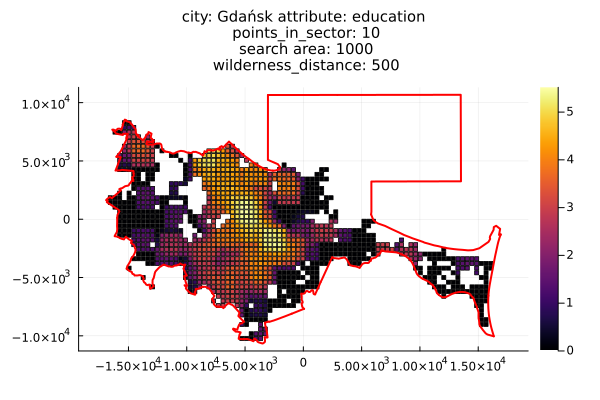

In [73]:
plot_heatmap(points,attr,bounds,:education,"Gdańsk",10,1000,500)